# Read Census Data

In [1]:
import pandas as pd

In [2]:
CENSUS_DATA_BASE_PATH = './census_data/'


## 2021 census

In [3]:
raw_2021 = pd.read_csv(CENSUS_DATA_BASE_PATH +'2021_census.csv', encoding = 'latin-1')

/tmp/ipykernel_1328778/2121620576.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,133,134,136,137,138,139,140,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272

In [4]:
raw_2021['Census_2021_CID'] = raw_2021.index
raw_2021['Census_2021_CID'] = 'Census_2021_CID_'+raw_2021['Census_2021_CID'].astype(str)

In [5]:
raw_2021

,Characteristics,Canada (CTRY) (01) (20000),Newfoundland and Labrador (PR) (10) (00000),"Division No. 1, CDR (Census division) (CD) (1001) (00000)","Division No. 1, Subd. V, SNO (Subdivision of unorganized) (CSD) (1001101) (01919)","Portugal Cove South, T (Town) (CSD) (1001105) (00909)","Trepassey, T (Town) (CSD) (1001113) (00000)","St. Shott's, T (Town) (CSD) (1001120) (00909)","Division No. 1, Subd. U, SNO (Subdivision of unorganized) (CSD) (1001124) (01010)","Cape Broyle, T (Town) (CSD) (1001126) (00000)",...,"Kitikmeot, REG (Region) (CD) (6208) (01020)","Kugaaruk, HAM (Hamlet) (CSD) (6208047) (01020)","Kugluktuk, HAM (Hamlet) (CSD) (6208059) (01020)","Bathurst Inlet, SET (Settlement) (CSD) (6208065) (09999)","Umingmaktok, SET (Settlement) (CSD) (6208068) (09999)","Cambridge Bay, HAM (Hamlet) (CSD) (6208073) (01010)","Gjoa Haven, HAM (Hamlet) (CSD) (6208081) (01030)","Taloyoak, HAM (Hamlet) (CSD) (6208087) (02030)","Kitikmeot, Unorganized, NO (Unorganized) (CSD) (6208098) (09999)",Census_2021_CID
0,"Population, 2021",36991981,510550,271878,55,86,405,55,1373,499,...,6458,1033,1382,0,0,1760,1349,934,0,Census_2021_CID_0
1,"Population, 2016",35151728,519716,270348,36,150,481,66,1625,489,...,6543,933,1491,0,0,1766,1324,1029,0,Census_2021_CID_1
2,"Population percentage change, 2016 to 2021",5,-2,1,53,-43,-16,-17,-16,2,...,-1,11,-7,...,...,0,2,-9,...,Census_2021_CID_2
3,Total private dwellings,16284235,269184,135137,72,85,299,50,1320,314,...,1954,225,438,0,0,701,339,251,0,Census_2021_CID_3
4,Private dwellings occupied by usual residents,14978941,223253,117178,29,47,224,34,628,228,...,1677,214,397,0,0,571,292,203,0,Census_2021_CID_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,Between 6 a.m. and 6:59 a.m.,2274845,22605,12035,0,0,30,0,90,25,...,45,10,10,x,x,15,15,0,x,Census_2021_CID_2618
2619,Between 7 a.m. and 7:59 a.m.,3435740,53845,30995,15,0,10,0,115,60,...,260,15,45,x,x,140,45,20,x,Census_2021_CID_2619
2620,Between 8 a.m. and 8:59 a.m.,2711355,48930,27515,0,15,40,0,110,40,...,1090,120,215,x,x,440,195,115,x,Census_2021_CID_2620
2621,Between 9 a.m. and 11:59 a.m.,1661340,20935,11745,0,0,0,0,40,25,...,265,35,55,x,x,65,65,45,x,Census_2021_CID_2621


# extract census area info

In [6]:
import re
def extract_CSDUID (combined_area_index):
    title_search = re.search('\(\d{7}\)', combined_area_index, re.IGNORECASE)
    if title_search:
        return title_search.group(0)[1:-1]
    else:
        return
def extract_PUID(combined_area_index):
    title_search = re.search('\(\d{2}\)', combined_area_index, re.IGNORECASE)
    if title_search:
        return title_search.group(0)[1:-1]
    else:
        return
def extract_CDUID(combined_area_index):
    title_search = re.search('\(\d{4}\)', combined_area_index, re.IGNORECASE)
    if title_search:
        return title_search.group(0)[1:-1]
    else:
        return

In [7]:
def transform_dataset_CSD(df, year):

    t_df = df.set_index(['Characteristics']).T
    if 'Profile of CD/C' in df.columns:
        t_df.drop(['Profile of CD/C'], inplace=True)
    if 'Profile of Cens' in df.columns:
        t_df.drop(['Profile of Cens'], inplace=True)
    t_df['CDUID'] = t_df.index.map(extract_CDUID)
    t_df['YEAR'] = year
    t_df.dropna(subset=['CDUID'],inplace=True)
    t_df.set_index('CDUID', inplace=True)
    t_df[f"year_{year}"]=1
    return t_df

In [8]:
def transform_dataset_CSD(df, year):
    

    t_df = df.set_index(['Characteristics']).T
    if 'Profile of CD/C' in df.columns:
        t_df.drop(['Profile of CD/C'], inplace=True)
    if 'Profile of Cens' in df.columns:
        t_df.drop(['Profile of Cens'], inplace=True)
    t_df['CSDUID'] = t_df.index.map(extract_CSDUID)
    t_df['YEAR'] = year
    t_df.dropna(subset=['CSDUID'],inplace=True)
    t_df.set_index('CSDUID', inplace=True)
    t_df[f"year_{year}"]=1
    return t_df

In [9]:
t_2021_df = transform_dataset_CSD(raw_2021,2021)

In [10]:
t_2021_df

Characteristics,"Population, 2021","Population, 2016","Population percentage change, 2016 to 2021",Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Total - Age groups of the population - 100% data,0 to 14 years,0 to 4 years,...,60 minutes and over,Total - Time leaving for work for the employed labour force aged 15 years and over with a usual place of work or no fixed workplace address - 25% sample data,Between 5 a.m. and 5:59 a.m.,Between 6 a.m. and 6:59 a.m.,Between 7 a.m. and 7:59 a.m.,Between 8 a.m. and 8:59 a.m.,Between 9 a.m. and 11:59 a.m.,Between 12 p.m. and 4:59 a.m.,YEAR,year_2021
CSDUID,,,,,,,,,,,,,,,,,,,,,
1001101,55,36,53,72,29,0,871,55,0,0,...,0,15,0,0,15,0,0,0,2021,1
1001105,86,150,-43,85,47,80,1,85,0,0,...,0,25,0,0,0,15,0,0,2021,1
1001113,405,481,-16,299,224,8,54,405,25,0,...,20,105,0,30,10,40,0,20,2021,1
1001120,55,66,-17,50,34,51,1,55,0,0,...,0,0,0,0,0,0,0,0,2021,1
1001124,1373,1625,-16,1320,628,2,742,1370,150,45,...,55,430,20,90,115,110,40,55,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208068,0,0,...,0,0,0,100,x,x,x,...,x,x,x,x,x,x,x,x,2021,1
6208073,1760,1766,0,701,571,9,196,1760,425,135,...,0,720,10,15,140,440,65,50,2021,1
6208081,1349,1324,2,339,292,47,29,1350,505,185,...,0,360,0,15,45,195,65,50,2021,1


In [11]:
MAP_SHAPE_FILE_PATH = "./canada_census_map_2021/lcsd_000b21a_e/lcsd000b21a_e.shp"

import geopandas
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()

canada= geopandas.read_file(MAP_SHAPE_FILE_PATH)

Loading BokehJS ...

In [12]:
ontario = canada[canada['PRUID'] == '35']

In [13]:
ontario

,CSDUID,DGUID,CSDNAME,CSDTYPE,LANDAREA,PRUID,geometry
2113,3501005,2021A00053501005,South Glengarry,TP,605.0159,35,"MULTIPOLYGON (((7569716.417 1174450.300, 75697..."
2114,3501007,2021A00053501007,Akwesasne (Part) 59,IRI,11.8096,35,"MULTIPOLYGON (((7569718.737 1174468.851, 75697..."
2115,3501011,2021A00053501011,South Stormont,TP,447.7113,35,"MULTIPOLYGON (((7535688.774 1153468.380, 75356..."
2116,3501012,2021A00053501012,Cornwall,CY,61.5044,35,"MULTIPOLYGON (((7556468.846 1165197.760, 75564..."
2117,3501020,2021A00053501020,South Dundas,MU,521.5418,35,"MULTIPOLYGON (((7517713.134 1134467.460, 75177..."
...,...,...,...,...,...,...,...
2685,3560096,2021A00053560096,Kasabonika Lake,IRI,101.7303,35,"MULTIPOLYGON (((6413249.386 1936213.623, 64132..."
2686,3560097,2021A00053560097,Muskrat Dam Lake,IRI,24.7125,35,"MULTIPOLYGON (((6206241.757 1916260.806, 62062..."
2687,3560098,2021A00053560098,Kingfisher Lake 1,IRI,9.1173,35,"POLYGON ((6334244.569 1877016.134, 6334257.551..."
2688,3560100,2021A00053560100,Wawakapewin,IRI,53.0382,35,"POLYGON ((6383810.311 1932408.637, 6383837.686..."


In [14]:
new_data = ontario[['CSDUID','CSDNAME']].join(t_2021_df, on=['CSDUID'])

In [15]:
new_data

,CSDUID,CSDNAME,"Population, 2021","Population, 2016","Population percentage change, 2016 to 2021",Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Total - Age groups of the population - 100% data,...,60 minutes and over,Total - Time leaving for work for the employed labour force aged 15 years and over with a usual place of work or no fixed workplace address - 25% sample data,Between 5 a.m. and 5:59 a.m.,Between 6 a.m. and 6:59 a.m.,Between 7 a.m. and 7:59 a.m.,Between 8 a.m. and 8:59 a.m.,Between 9 a.m. and 11:59 a.m.,Between 12 p.m. and 4:59 a.m.,YEAR,year_2021
2113,3501005,South Glengarry,13330,13150,1,5848,5431,22,605,13330,...,360,4945,455,1145,1320,835,400,800,2021,1
2114,3501007,Akwesasne (Part) 59,..,1693,..,..,..,..,12,x,...,x,x,x,x,x,x,x,x,2021,1
2115,3501011,South Stormont,13570,13110,4,5583,5412,30,448,13570,...,435,5510,625,1325,1490,875,380,815,2021,1
2116,3501012,Cornwall,47845,46589,3,22214,21386,778,62,47845,...,925,15700,1395,3230,3565,2420,1275,3820,2021,1
2117,3501020,South Dundas,11044,10852,2,4821,4651,21,522,11045,...,530,3895,550,1045,1095,485,215,505,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,3560096,Kasabonika Lake,1060,849,25,252,228,10,102,1060,...,0,280,0,0,20,135,110,10,2021,1
2686,3560097,Muskrat Dam Lake,..,281,..,..,..,..,25,x,...,x,x,x,x,x,x,x,x,2021,1
2687,3560098,Kingfisher Lake 1,511,511,0,127,117,56,9,510,...,0,180,0,10,10,60,80,15,2021,1
2688,3560100,Wawakapewin,16,22,-27,14,9,0,53,x,...,x,x,x,x,x,x,x,x,2021,1


# Map plotting

In [16]:
DATA_PATH = 'census_data/selected_df.csv'

In [17]:
selected_data = pd.read_csv(DATA_PATH)

In [18]:
selected_data.head()

,CSDUID,CSDNAME,full_time_medium_income,average_household_size,%_low_income,total_dwelling_count,dwelling_need_regular_or_minor_repair,dwelling_need_major_repair,%_in_core_housing_need_owner,%_in_core_housing_need_tenant
0,1001101,"Division No. 1, Subd. V",x,2,x,20,20,0,0,...
1,1001105,Portugal Cove South,x,2,x,40,40,0,0,...
2,1001113,Trepassey,63200,2,26,205,185,20,10,...
3,1001120,St. Shott's,x,2,x,45,45,0,0,...
4,1001124,"Division No. 1, Subd. U",52800,2,10,630,600,25,4,0


In [19]:
selected_data['CSDUID'] = selected_data['CSDUID'].astype(str)

In [20]:
selected_data  = selected_data.set_index('CSDUID')

In [21]:
selected_data

,CSDNAME,full_time_medium_income,average_household_size,%_low_income,total_dwelling_count,dwelling_need_regular_or_minor_repair,dwelling_need_major_repair,%_in_core_housing_need_owner,%_in_core_housing_need_tenant
CSDUID,,,,,,,,,
1001101,"Division No. 1, Subd. V",x,2,x,20,20,0,0,...
1001105,Portugal Cove South,x,2,x,40,40,0,0,...
1001113,Trepassey,63200,2,26,205,185,20,10,...
1001120,St. Shott's,x,2,x,45,45,0,0,...
1001124,"Division No. 1, Subd. U",52800,2,10,630,600,25,4,0
...,...,...,...,...,...,...,...,...,...
6208068,Umingmaktok,x,x,x,x,x,x,x,x
6208073,Cambridge Bay,105000,3,13,570,450,120,12,30
6208081,Gjoa Haven,56000,5,12,295,175,120,22,48


In [22]:
selected_data2 = selected_data.replace('x', '-999')
selected_data2 = selected_data2.replace('...','-999')

In [23]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=-999, strategy='mean')


In [24]:
imputer = imp_mean.fit(selected_data2[['full_time_medium_income',
            'average_household_size',
            "%_low_income",
            'total_dwelling_count',
            'dwelling_need_regular_or_minor_repair',
            'dwelling_need_major_repair',
            '%_in_core_housing_need_owner',
            '%_in_core_housing_need_tenant']])
selected_data2[['full_time_medium_income',
            'average_household_size',
            "%_low_income",
            'total_dwelling_count',
            'dwelling_need_regular_or_minor_repair',
            'dwelling_need_major_repair',
            '%_in_core_housing_need_owner',
            '%_in_core_housing_need_tenant']] = imputer.transform(selected_data2[['full_time_medium_income',
            'average_household_size',
            "%_low_income",
            'total_dwelling_count',
            'dwelling_need_regular_or_minor_repair',
            'dwelling_need_major_repair',
            '%_in_core_housing_need_owner',
            '%_in_core_housing_need_tenant']])

In [25]:
alberta = canada[canada['PRUID'] == '48']

In [26]:
alberta.columns

Index(['CSDUID', 'DGUID', 'CSDNAME', 'CSDTYPE', 'LANDAREA', 'PRUID',
       'geometry'],
      dtype='object')

In [27]:
join_df = alberta[['CSDUID','geometry']].join(selected_data2, on=['CSDUID'])

In [28]:
join_df

,CSDUID,geometry,CSDNAME,full_time_medium_income,average_household_size,%_low_income,total_dwelling_count,dwelling_need_regular_or_minor_repair,dwelling_need_major_repair,%_in_core_housing_need_owner,%_in_core_housing_need_tenant
3880,4801003,"POLYGON ((4864674.580 1822138.769, 4864705.831...",Cypress County,66000.000000,3.0,10.000000,2655.0,2535.0,125.0,3.000000,0.00000
3881,4801006,"POLYGON ((4879079.940 1746671.609, 4879105.751...",Medicine Hat,62800.000000,2.0,11.000000,27215.0,25910.0,1300.0,4.000000,20.00000
3882,4801008,"POLYGON ((4836621.006 1755354.880, 4836754.991...",Forty Mile County No. 8,44000.000000,3.0,10.000000,860.0,800.0,60.0,17.000000,0.00000
3883,4801009,"POLYGON ((4805645.331 1698585.263, 4805735.603...",Foremost,53200.000000,2.0,11.000000,210.0,200.0,10.0,0.000000,0.00000
3884,4801014,"POLYGON ((4824948.200 1739952.206, 4824747.643...",Bow Island,54000.000000,3.0,18.000000,670.0,630.0,50.0,14.000000,21.00000
...,...,...,...,...,...,...,...,...,...,...,...
4298,4819071,"POLYGON ((4660542.663 2546356.397, 4664941.563...",Peace No. 135,60800.000000,3.0,7.000000,575.0,515.0,60.0,16.000000,0.00000
4299,4819072,"POLYGON ((4670248.320 2530456.726, 4670529.477...",Berwyn,60000.000000,2.0,12.000000,235.0,210.0,25.0,17.000000,0.00000
4300,4819074,"POLYGON ((4679924.489 2532825.403, 4679642.971...",Grimshaw,73000.000000,2.0,9.000000,1080.0,980.0,105.0,5.000000,11.00000
4301,4819815,"POLYGON ((4524081.491 2503530.717, 4523736.517...",Horse Lakes 152B,54400.000000,4.0,19.000000,115.0,65.0,50.0,4.657602,12.11158


In [29]:
import bokeh.plotting as bp
from bokeh.plotting import figure, output_file, save

In [30]:
plot_handle = join_df.plot_bokeh(simplify_shapes=20000,
              category="%_low_income",  
              colormap="Spectral", 
              title = f"Map Example",
              colormap_range=[9,37],
              hovertool_columns=["CSDNAME","%_low_income"])
plot_handle.xaxis.axis_label_text_font_size = "14pt"
plot_handle.yaxis.axis_label_text_font_size = "14pt"
plot_handle.title.text_font_size = "16pt"
plot_handle.xaxis.major_label_text_font_size = "12pt"
plot_handle.yaxis.major_label_text_font_size = "12pt"
bp.show(plot_handle)

/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:114: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "Polygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:117: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "MultiPolygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:114: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "Polygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:117: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribu

/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:117: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "MultiPolygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:114: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "Polygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:117: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "MultiPolygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:114: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' at

/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:114: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "Polygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:117: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "MultiPolygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:114: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "Polygon":
/home/bobohope/anaconda3/lib/python3.9/site-packages/pandas_bokeh/geoplot.py:114: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribu

# heat map example

In [31]:
heat_map_data = selected_data2[['full_time_medium_income',
            'average_household_size',
            "%_low_income",
            'total_dwelling_count',
            'dwelling_need_regular_or_minor_repair',
            'dwelling_need_major_repair',
            '%_in_core_housing_need_owner',
            '%_in_core_housing_need_tenant']]

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
heat_map_data.corr()

,full_time_medium_income,average_household_size,%_low_income,total_dwelling_count,dwelling_need_regular_or_minor_repair,dwelling_need_major_repair,%_in_core_housing_need_owner,%_in_core_housing_need_tenant
full_time_medium_income,1.000000,-0.062135,-0.546722,0.090500,0.091782,0.069825,0.020345,0.109177
average_household_size,-0.062135,1.000000,0.224470,0.008568,0.008950,0.002902,0.049265,0.065457
%_low_income,-0.546722,0.224470,1.000000,-0.060962,-0.062459,-0.037924,0.142418,0.087123
total_dwelling_count,0.090500,0.008568,-0.060962,1.000000,0.999890,0.977088,0.012629,0.072389
dwelling_need_regular_or_minor_repair,0.091782,0.008950,-0.062459,0.999890,1.000000,0.973830,0.012502,0.072825
dwelling_need_major_repair,0.069825,0.002902,-0.037924,0.977088,0.973830,1.000000,0.014216,0.064394
%_in_core_housing_need_owner,0.020345,0.049265,0.142418,0.012629,0.012502,0.014216,1.000000,0.326606
%_in_core_housing_need_tenant,0.109177,0.065457,0.087123,0.072389,0.072825,0.064394,0.326606,1.000000


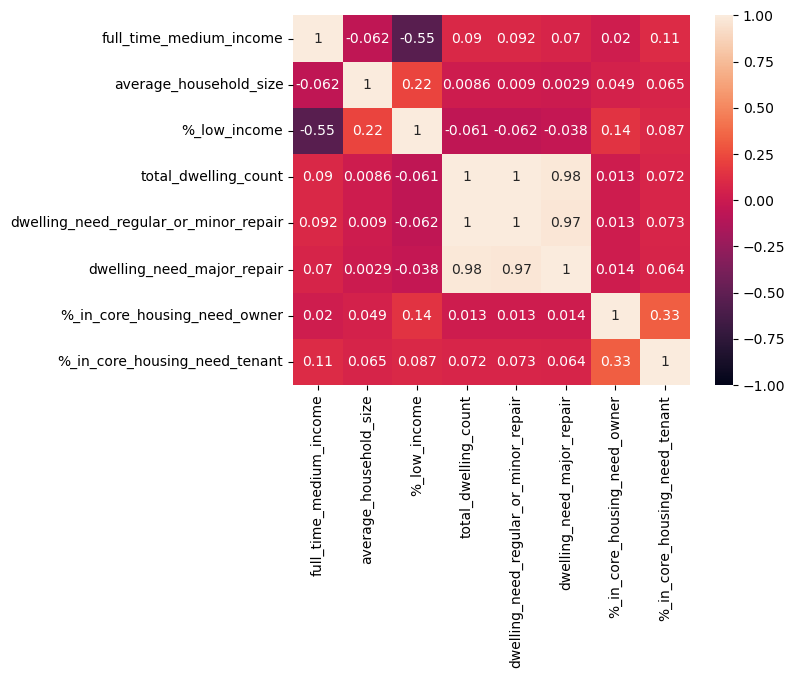

In [34]:
sns.heatmap(heat_map_data.corr(),vmin=-1, vmax=1, annot=True);


In [35]:
import numpy as np
import statsmodels.api as sm
import pylab as py

In [36]:
data_points = selected_data2['full_time_medium_income'].values

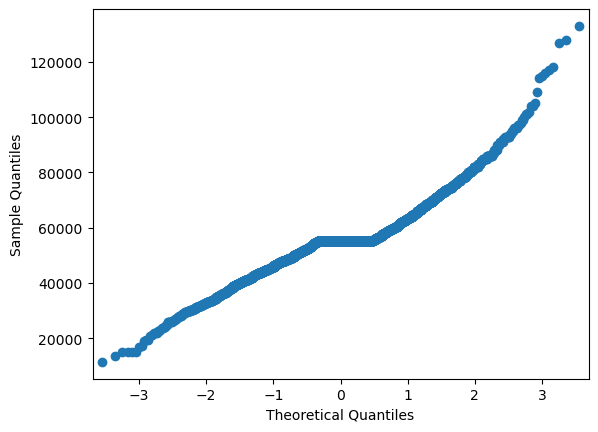

In [37]:
sm.qqplot(data_points)
py.show()